Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs

Due: January 30th, 2023
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [3]:
# Your solution goes here
df = pd.read_csv('chicken.csv')
df

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
...,...,...,...,...,...
355,22,212,C,2966.5,4
356,22,176,C,3927.9,4
357,22,180,C,3361.6,5
358,22,193,C,3804.4,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [ ]:
# Your solution goes here
diet = df.groupby('diet').aggregate({'weight':['mean', 'min', 'max','median']})
print(diet)

### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [4]:
# Your solution goes here
df.groupby(['diet']).describe()['weight']

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 3.1 Histogram of age of chickens (Pandas hist())

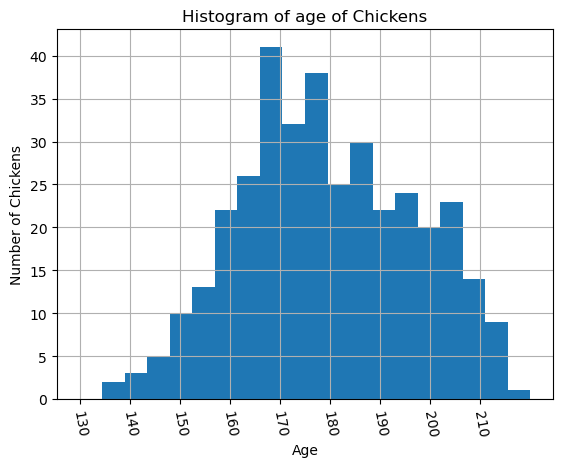

In [11]:
# Your solution goes here
chicken_age = df.hist(column='age',bins = 20, range = [130,220],)
for chicken in chicken_age.flatten(): 
    chicken.set_title("Histogram of age of Chickens") 
    chicken.set_xlabel("Age") 
    chicken.set_ylabel("Number of Chickens") 
    chicken.set_xticks(np.arange(130,220,10))

### 3.2 Histogram of age of chickens (Seaborn distplot())

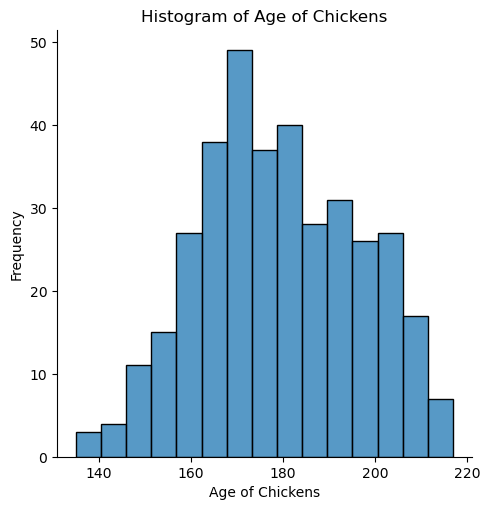

In [12]:
# Your solution goes here
# Your solution goes here
df = pd.read_csv('chicken.csv', index_col = None)
age_sns = sns.displot(data=df, x = 'age',kind='hist', bins =15)
age_sns.set(title = 'Histogram of Age of Chickens',xlabel = 'Age of Chickens', ylabel = 'Frequency')

### 4.1 Boxplot age (Pandas boxplot())

Text(0.5, 1.0, 'Distribution of Ages')

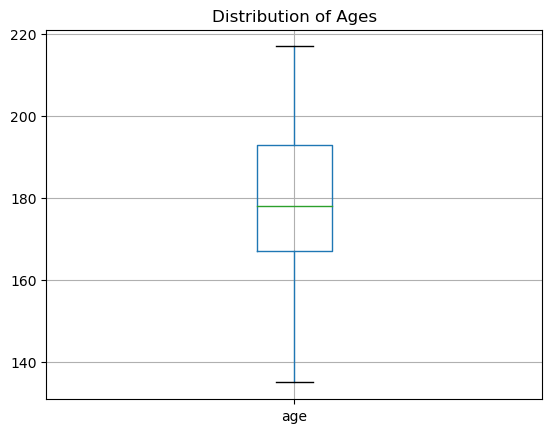

In [13]:
# Your solution goes here
# Your solution goes here
chicken_boxplot = df.boxplot(column=['age'])
plt.title("Distribution of Ages")

### 4.2 Boxplot age (Seaborn boxplot())

Text(0.5, 1.0, 'Distribution of Ages')

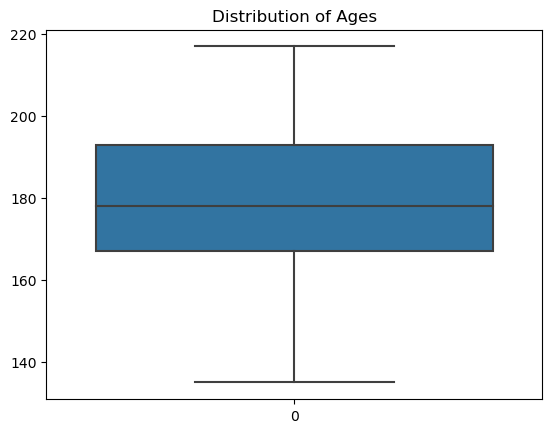

In [15]:
# Your solution goes here
chicken_seaBoxplot = sns.boxplot(data = df['age'])
plt.title("Distribution of Ages")

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

Text(0, 0.5, 'Average weight')

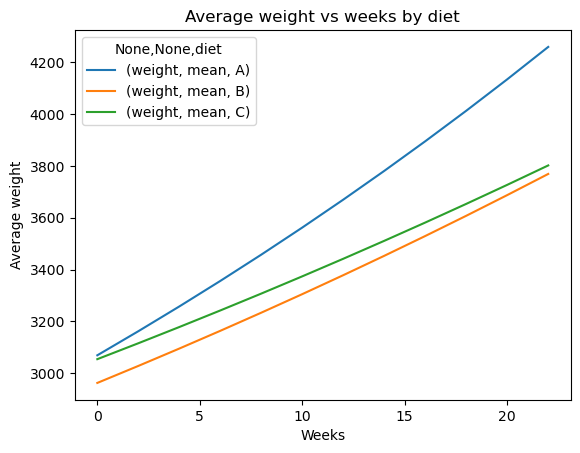

In [18]:
# Your solution goes here
#Step1 groupby week and diet and caculate the mean weight 
chicken_aggweight = df.groupby(['week','diet']).aggregate({'weight':['mean']}).unstack()
chicken_aggweight.plot()
#Now we want to unstack the date when plot 
plt.title("Average weight vs weeks by diet")
plt.xlabel("Weeks")
plt.ylabel("Average weight")

#How to add a legend for this?

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot:xlabel='week', ylabel='weight'>

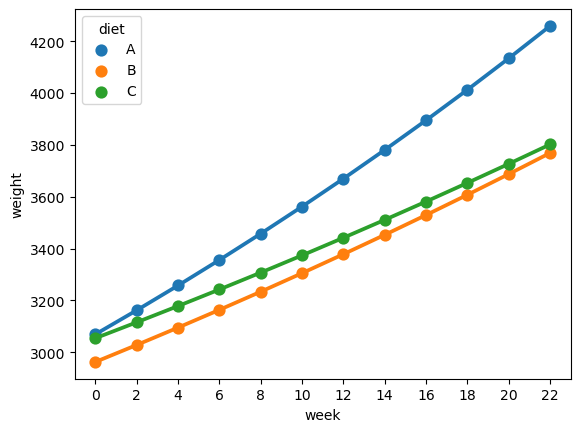

In [20]:
# Your solution goes here
sns.pointplot(x='week', y='weight', hue='diet', data=df, ci=None)

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

     eggs          
     mean          
diet    A    B    C
week               
0     4.6  4.4  4.6
2     4.5  3.8  4.2
4     4.6  4.2  4.0
6     4.4  4.2  4.1
8     4.2  3.9  4.3
10    4.6  3.9  4.2
12    4.3  3.9  4.0
14    4.6  4.1  4.2
16    4.3  4.0  4.0
18    4.4  4.0  4.3
20    4.7  4.0  4.0
22    4.6  4.0  4.2


(3.0, 5.0)

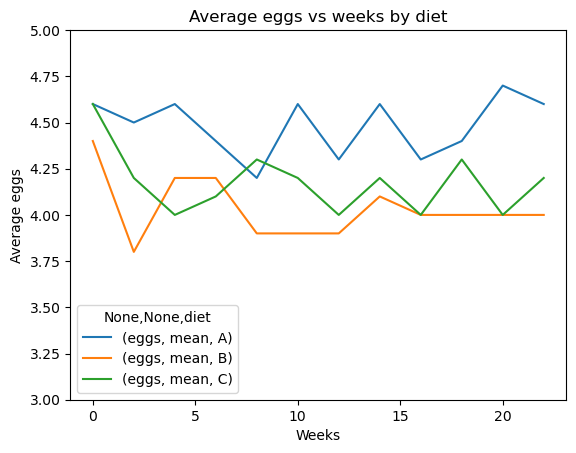

In [21]:
# Your solution goes here
chicken_aggegg = df.groupby(['week','diet']).aggregate({'eggs':['mean']}).unstack()
print(chicken_aggegg)   
chicken_aggegg.plot()
plt.title("Average eggs vs weeks by diet")
plt.xlabel("Weeks")
plt.ylabel("Average eggs")
plt.ylim([3, 5])

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

<AxesSubplot:xlabel='week', ylabel='eggs'>

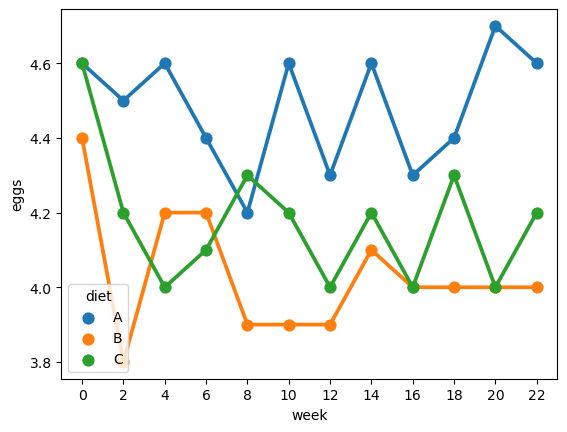

In [23]:
# Your solution goes here
sns.pointplot(x='week', y='eggs', hue='diet', data=df, ci=None)

### 7. Average age by diet stats (Pandas groupby())

In [24]:
# Your solution goes here
chicken = pd.read_csv('chicken.csv', index_col = None)
chicken_age = chicken.groupby(['diet']).aggregate({'age':['mean']})
print(chicken_age)


        age
       mean
diet       
A     166.5
B     187.9
C     183.4


### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


<AxesSubplot:xlabel='age', ylabel='eggs'>

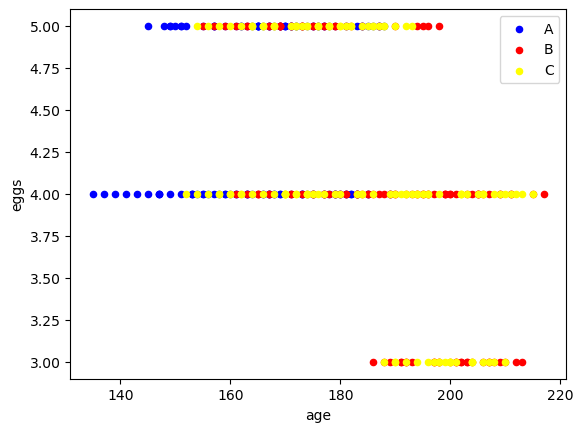

In [25]:
# Your solution goes here
scatter_ax = plt.axes()
df[df.diet == 'A'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='blue', label='A')
df[df.diet == 'B'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='red', label='B')
df[df.diet == 'C'].plot.scatter(x='age', y='eggs', ax=scatter_ax, c='yellow', label='C')

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


<AxesSubplot:xlabel='age', ylabel='eggs'>

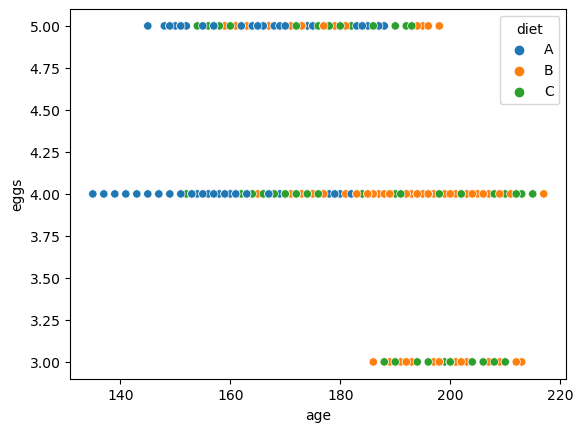

In [26]:
# Your solution goes here
sns.scatterplot(x='age', y='eggs', hue='diet', data=df)

### 9.1 Boxplot age by diet (Pandas boxplot())

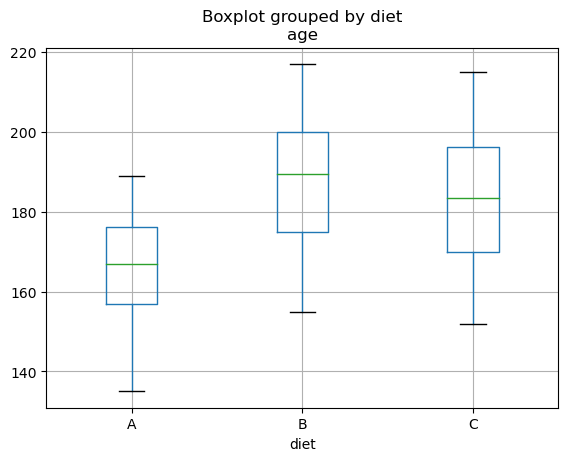

In [27]:
# Your solution goes here
# Your solution goes here
chicken_boxplot = df.boxplot(column=['age'], by='diet')

### 9.2 Boxplot age by diet (Seaborn boxplot())

Text(0.5, 1.0, 'Boxplot - Age Distribution of Chickens by Diet')

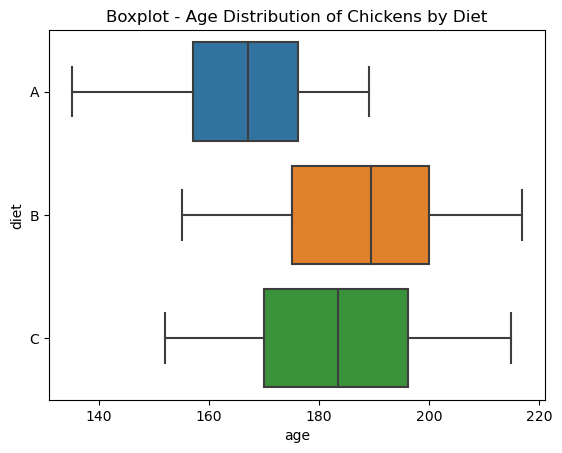

In [28]:
# Your solution goes here
chicken = pd.read_csv('chicken.csv', index_col = None)
boxplot = sns.boxplot(x='age', y='diet', data=chicken)
boxplot.set_title("Boxplot - Age Distribution of Chickens by Diet")

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**

Pandas Strengths: One of the strength for pandas is being able to use the groupby() function as it allows you to group data based on which column is important. A weakness of using pandas is that it does not create aesthetically pleasing visualization and would take more time to switching between different library to create different kind of plots.

Compared to Pandas, Seaborn is more visually pleasing compared to Pandas. Seaborn plots can also be directly created from the orginal dataframe and does not need to using functions such as groupby() or stack(). The negative of Seaborn is that the dataframe that is being used for the plot needs to be clean and edited before plotting(which is usually by pandas)

Pandas are technically more user friendly and easier to clean up data however they do not produce amazing visuals or aesthetics for it's graphs. However, if the dataframe is already "cleaned up" from unwanted data, Seaborns can produce better usually visuals with less code. It depends on what the user is striving for and what condition the information comes in orginally.




